In [12]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

from time import time
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('telecom_preprocessed.csv')
data.head()

,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,0,37,1,0,2,9,5,1,42.39,0,...,1,1,1,1,65.6,593.30,0,381.51,974.81,1
1,1,46,0,0,0,9,5,1,10.69,1,...,0,0,0,1,-4.0,542.40,10,96.21,610.28,1
2,1,50,0,0,0,4,4,1,33.65,0,...,1,0,1,0,73.9,280.85,0,134.60,415.45,0
3,1,78,1,0,1,13,3,1,27.82,0,...,1,0,1,0,98.0,1237.85,0,361.66,1599.51,0
4,0,75,1,0,3,3,5,1,7.38,0,...,1,0,1,1,83.9,267.40,0,22.14,289.54,0


### Entrenamiento y test del modelo de Decision Tree

In [14]:
X = data.drop(columns = "customer_status")
y = data["customer_status"].values

In [15]:
mln = 10
#TRAINING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = DecisionTreeClassifier(max_leaf_nodes=mln)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [16]:
#TEST
y_pred = classifier.predict(X_test)

In [17]:
#Análisis de resultados
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  0.8487607486090035
              precision    recall  f1-score   support

           0       0.85      0.56      0.68       561
           1       0.85      0.96      0.90      1416

    accuracy                           0.85      1977
   macro avg       0.85      0.76      0.79      1977
weighted avg       0.85      0.85      0.84      1977

[[ 316  245]
 [  54 1362]]


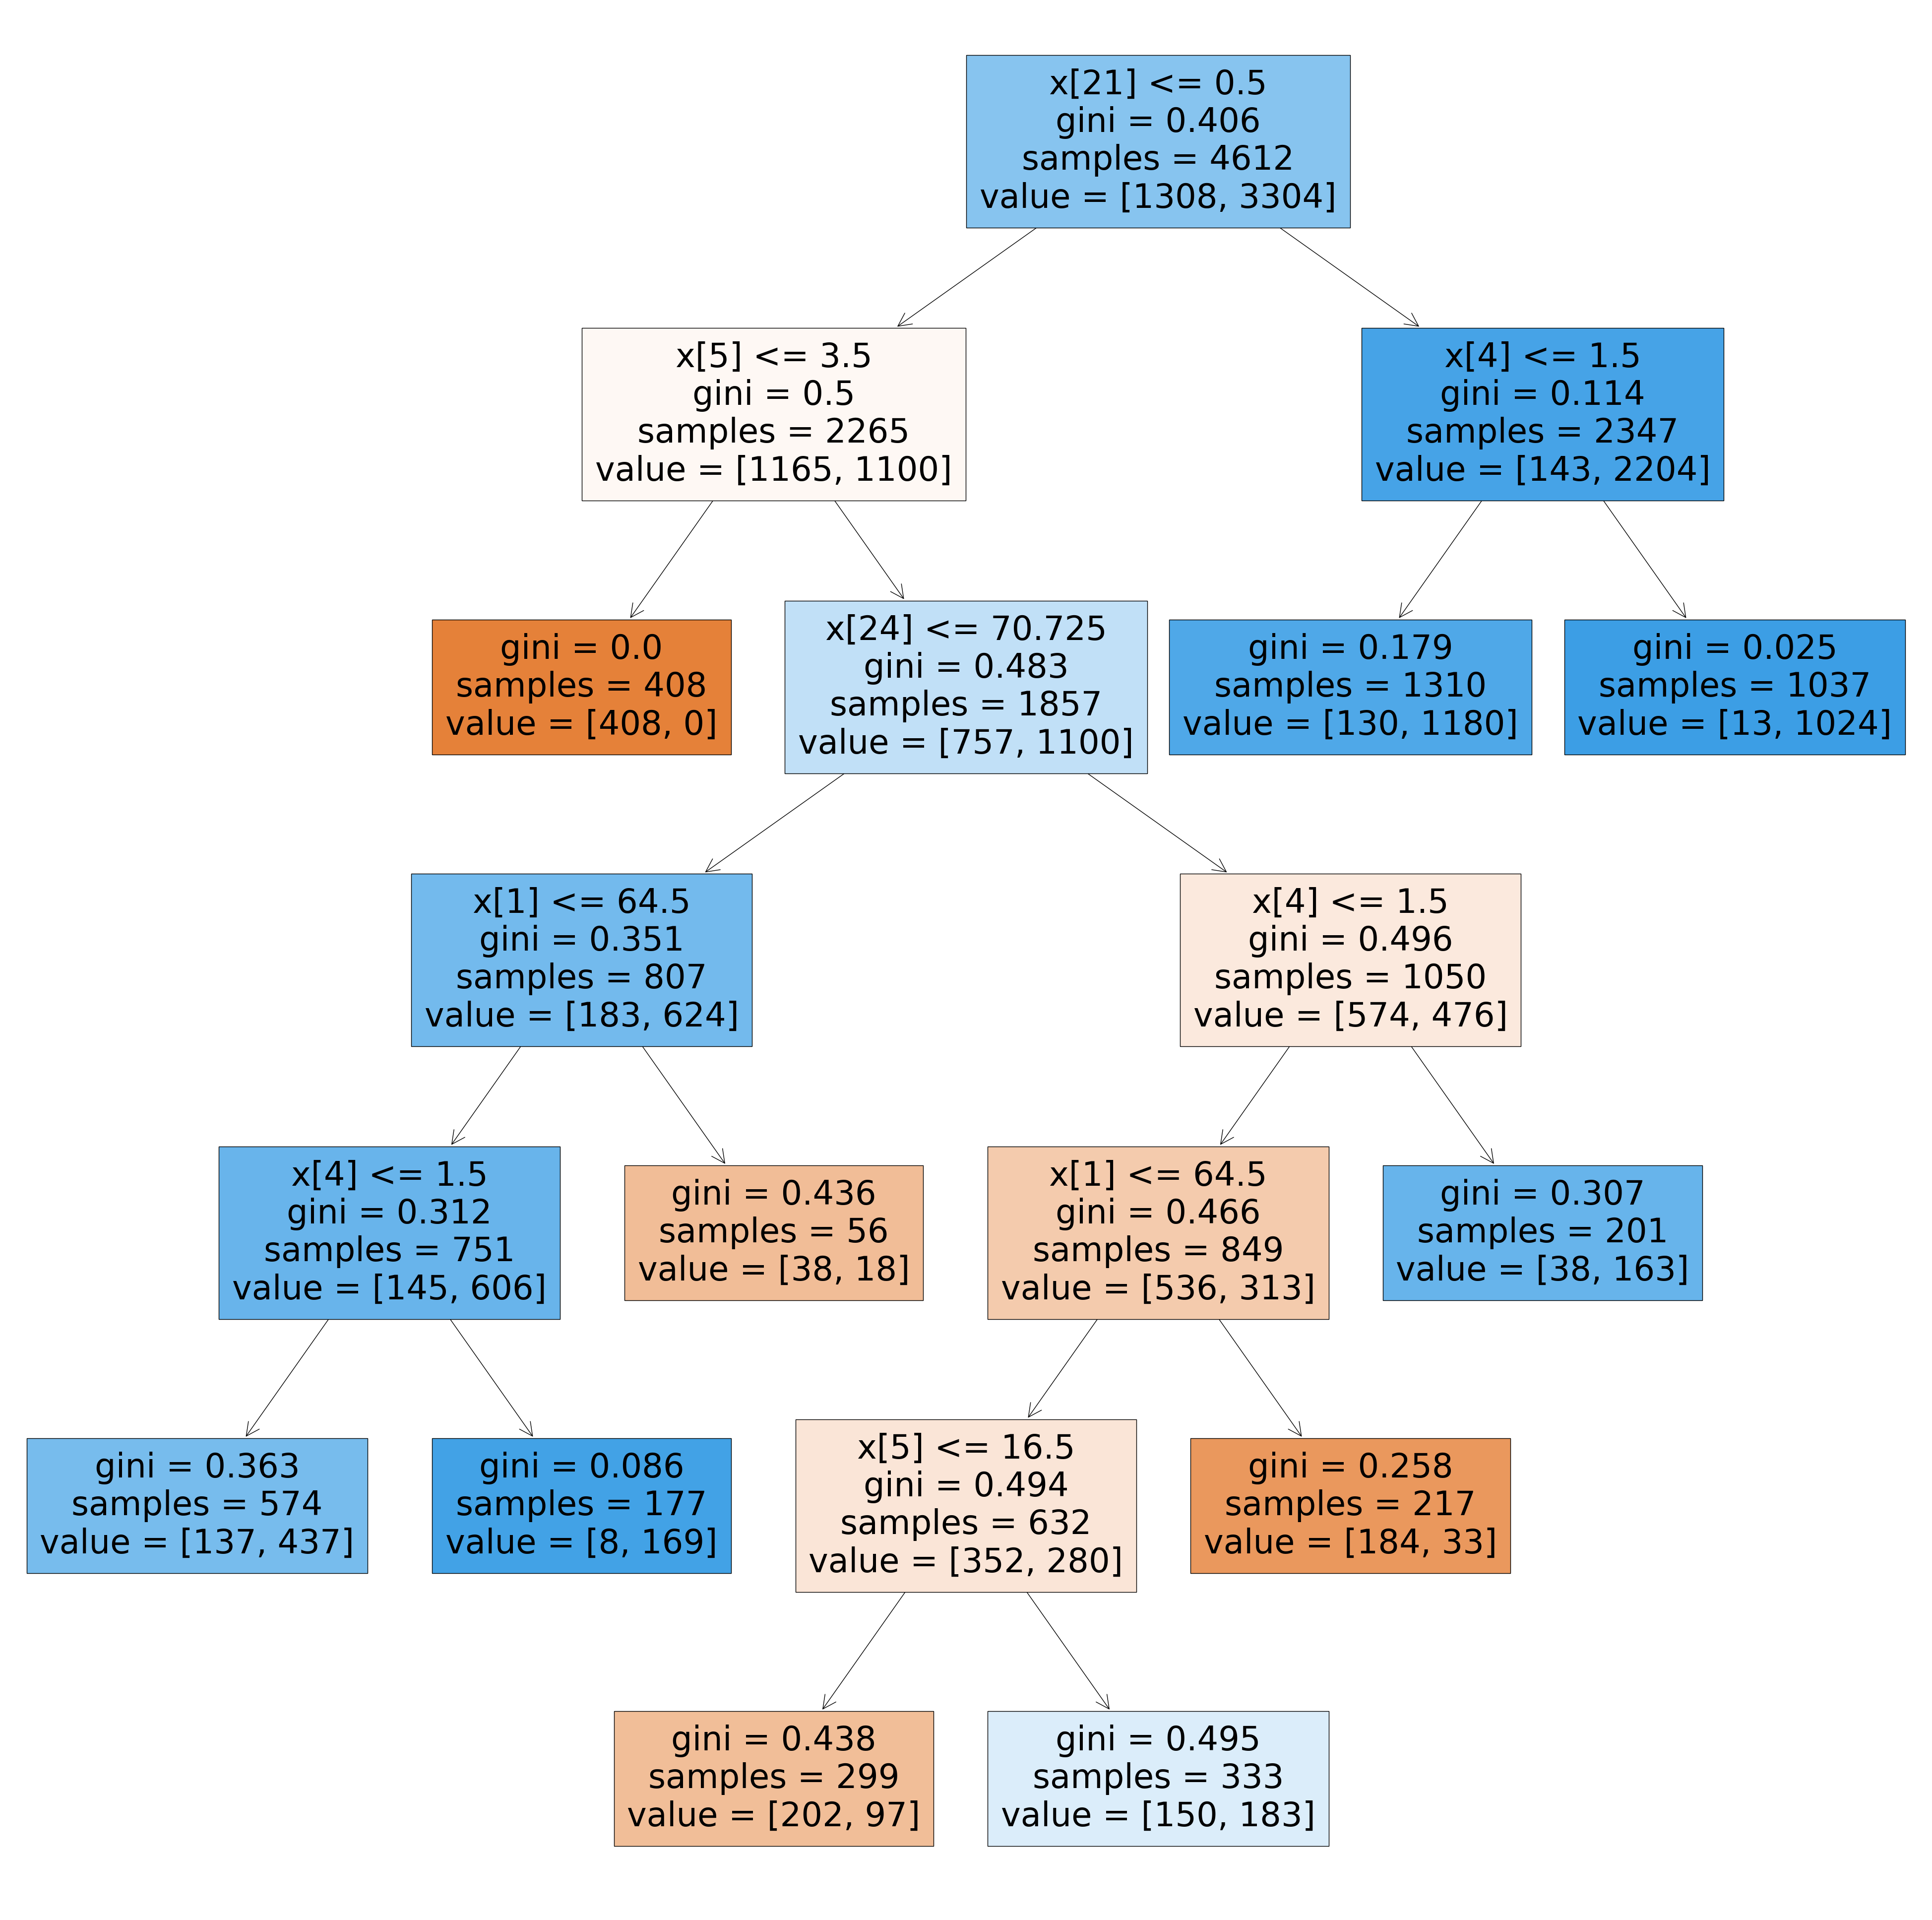

In [18]:
plt.figure(figsize=(50,50))
plot_tree(classifier, filled=True)
#plt.savefig('tree.png')
plt.show()

In [19]:
for i in range(len(data.columns)):
    print(i, ":", data.columns[i])

0 : gender
1 : age
2 : married
3 : number_of_dependents
4 : number_of_referrals
5 : tenure_in_months
6 : offer
7 : phone_service
8 : avg_monthly_long_distance_charges
9 : multiple_lines
10 : internet_service
11 : internet_type
12 : avg_monthly_gb_download
13 : online_security
14 : online_backup
15 : device_protection_plan
16 : premium_tech_support
17 : streaming_tv
18 : streaming_movies
19 : streaming_music
20 : unlimited_data
21 : contract
22 : paperless_billing
23 : payment_method
24 : monthly_charge
25 : total_charges
26 : total_extra_data_charges
27 : total_long_distance_charges
28 : total_revenue
29 : customer_status


### Ajuste del número de hojas (max_leaf_nodes)

In [27]:
def analysis_of_results(X, y, max_max_leaf_nodes, step=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)
    scores = []
    fit_time = []
    predict_time = []
    
    for mln in range(2, max_max_leaf_nodes, step):
        start_time = time()
        classifier = DecisionTreeClassifier(max_leaf_nodes=mln) 
        classifier.fit(X_train, y_train)
        elapsed_time = time() - start_time
        fit_time.append(elapsed_time)      

        start_time = time()
        y_pred = classifier.predict(X_test)
        elapsed_time = time() - start_time
        predict_time.append(elapsed_time)

        scores.append(accuracy_score(y_test, y_pred))
        
    plt.figure()
    plt.xlabel('mln')
    plt.ylabel('accuracy')
    plt.plot(range(2, max_max_leaf_nodes, step), scores)
    #plt.xticks([0,5,10,15,20])
    plt.show()
    
    plt.figure()
    plt.xlabel('mln')
    plt.ylabel('time')
    plt.plot(range(2, max_max_leaf_nodes, step), fit_time, label='fit')
    plt.plot(range(2, max_max_leaf_nodes, step), predict_time, label='predict')
    plt.legend(loc='best')
    plt.show()

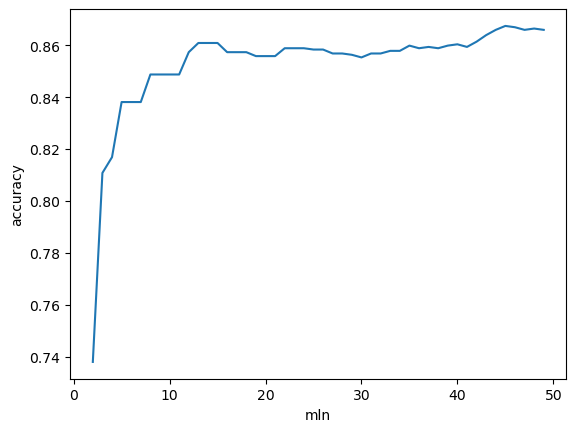

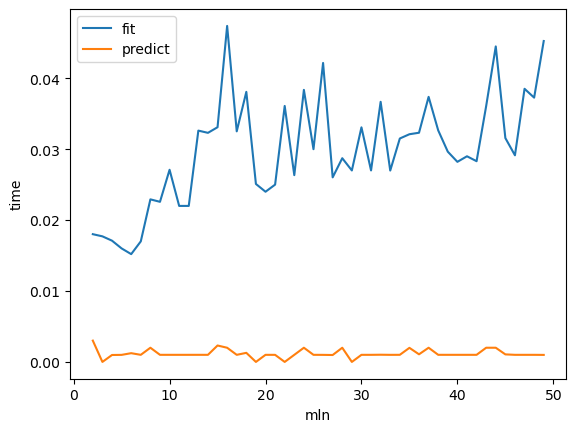

In [28]:
analysis_of_results(X, y, 50)

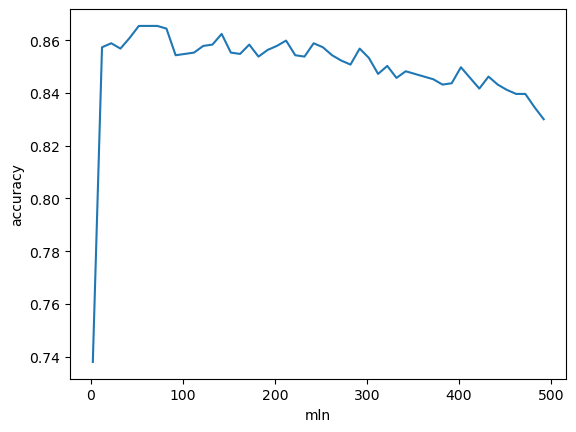

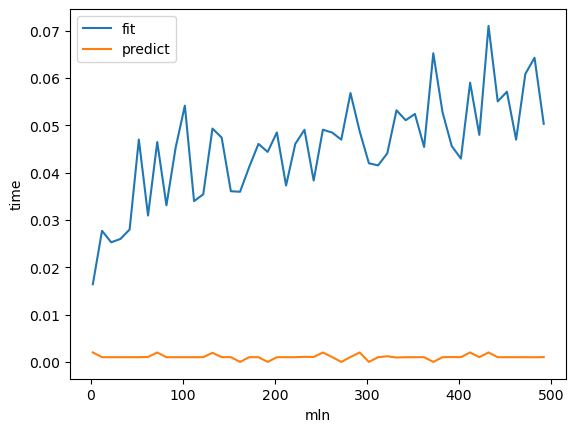

In [29]:
analysis_of_results(X, y, 500, 10)

### Hiperparámetros del modelo DecisionTree

DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

Se puede consultar el significado de cada hiperparámetro aquí: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Ejercicios

Consulta los hiperparámetros en la URL anterior y realiza los siguientes ejercicios:

1. Aprender un nuevo DT con 20 hojas
2. Aprender un nuevo DT con una profundidad máxima de 10 niveles
3. Aprender un nuevo DT considerando únicamente 5 features
4. Aprender un nuevo DT con los hiperparámetros que consideres más adecuados

Compara los resultados obtenidos.